### PRELIMINARY ANALYSIS
### - This data descibes the medical cost based on the 6 variables 
### - They are as follows:
###   -- Age - This is the age of the individual. The range is 18 to 64 years. 
###   -- Sex - Sex of the individual, in this case considering only Male and Female(Categorical)
###   -- BMI - This the Body Mass Index of the individual(Continuous)
###   -- Children - The number of children each individual has
###   -- Smoker - Do they smoke or not. Yes/No
###   -- Region - Which region do they belong to out of the 4. 
###   -- Charges - Medical Charges of each person. 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv(r'C:/Users/yashw/Desktop/Python Projects Personal/Medical Insurance - Linear Regression/Medical_Insurance_Predictions (1).csv')

In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
data.shape

(1338, 7)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Text(0.5, 1.0, 'Distribution of Charges')

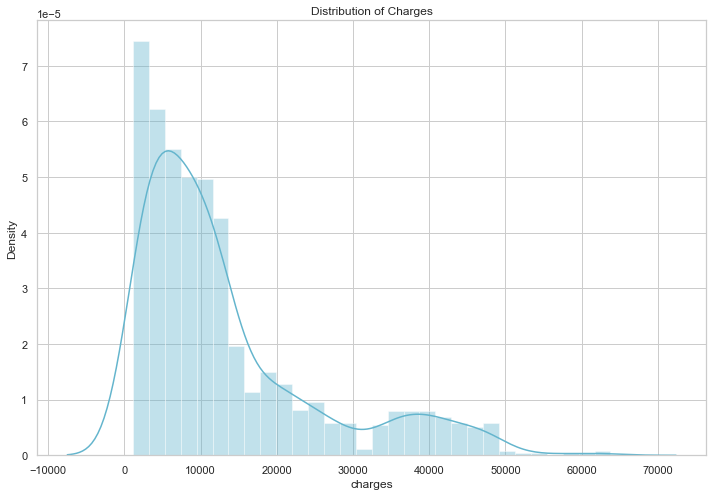

In [12]:
sns.set(style='whitegrid')
ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(data['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

In [13]:
# The distribution is right skewed. Right skewed means that the tail lies on the right side. Inorder to normalize this 
# distrubution I will be using a natural log in the graph below. 

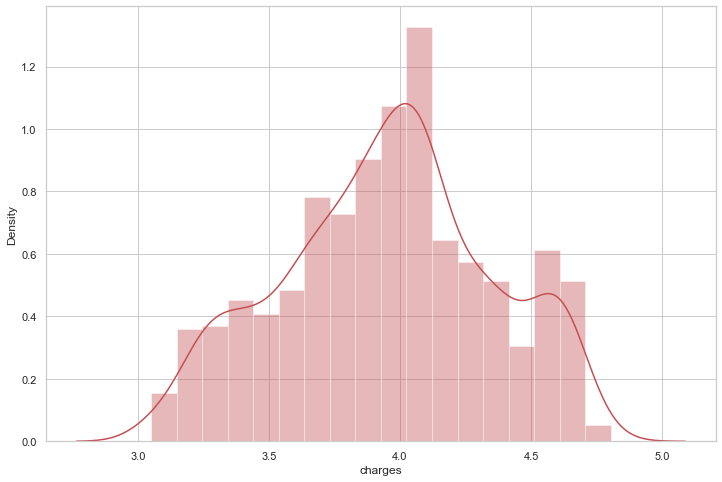

In [15]:
ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(data['charges']), kde = True, color = 'r' )

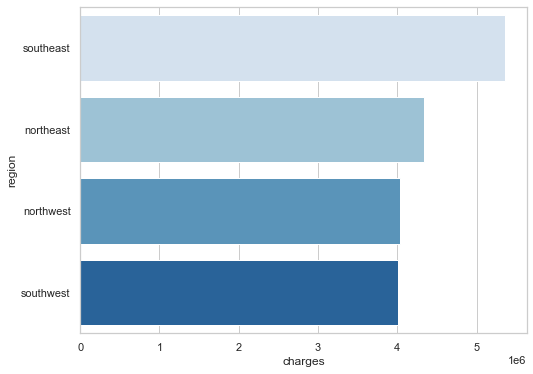

In [16]:
charges = data['charges'].groupby(data.region).sum().sort_values(ascending = False)
ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')

In [17]:
# In the plot above I've grouped the charges by region and added them up. It can clearly seen that the charges in the southeast
# region the charges are the highest. The charges in the people residing in the southwest region, the charges are the lowest. 

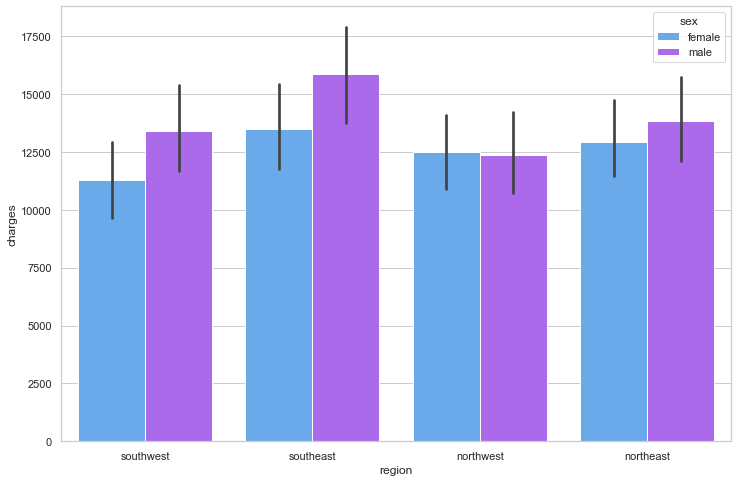

In [18]:
ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=data, palette='cool')

In [19]:
# The same can be seen with a differenciation between charges incurred by male and female payers.

In [20]:
# Converting objects to categorical 

data[['sex', 'smoker', 'region']] = data[['sex', 'smoker', 'region']].astype('category')
data.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [21]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

# convert category into numerical
label.fit(data.sex.drop_duplicates())
data.sex = label.transform(data.sex)
data.sex

label.fit(data.smoker.drop_duplicates())
data.smoker = label.transform(data.smoker)

label.fit(data.region.drop_duplicates())
data.region = label.transform(data.region)
data.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

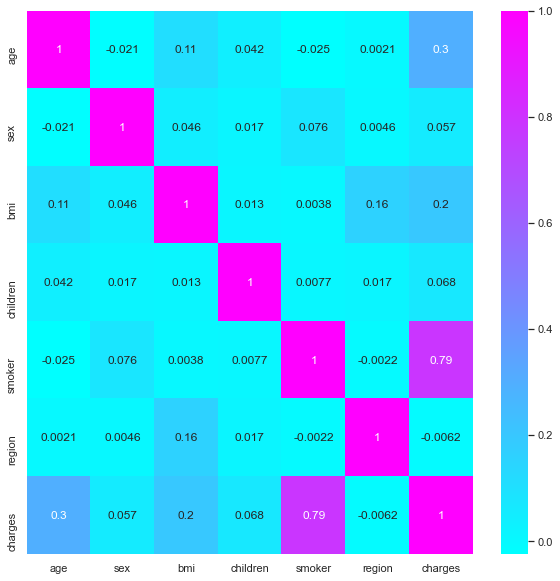

In [22]:
# correlation 

ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(data.corr(), annot=True, cmap='cool')

In [23]:
# From the correlation heatmap above it can be seen that only 'smoker' has the highest correlation at 0.79. 

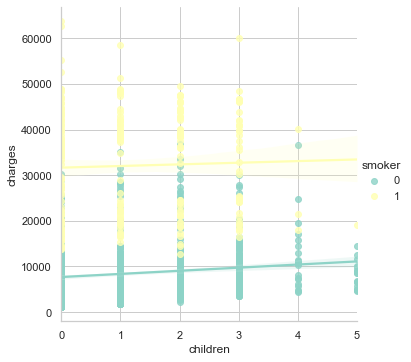

In [25]:
ax = sns.lmplot(x = 'children', y = 'charges', data=data, hue='smoker', palette='Set3')


In [ ]:
# Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less, which the following violinplots shows too

### Linear Regression

In [28]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [29]:
x = data.drop(['charges'], axis = 1)
y = data['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)

LinearRegression()

In [30]:
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-11661.98390882441
[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
0.7998747145449959


### Polynomial Regression

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
x = data.drop(['charges', 'sex', 'region'], axis = 1)
y = data.charges
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = holdout(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)

In [33]:
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(x_test, y_test))

-5325.881705252248
[ 0.00000000e+00 -4.01606591e+01  5.23702019e+02  8.52025026e+02
 -9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
  4.20849790e+00 -9.38983382e+00  3.81612289e+00  1.40840670e+03
 -1.45982790e+02 -4.46151855e+02 -9.52698471e+03]
0.8812595703345225


In [34]:
##Evaluating the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 2824.4950454776617
Mean Squared Error: 18895160.09878044
Root Mean Squared Error: 4346.856346692451


In [35]:
##Predicting the charges
y_test_pred = Pol_reg.predict(x_test)
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
578,9724.53000,12101.156323
610,8547.69130,10440.782266
569,45702.02235,48541.022951
1034,12950.07120,14140.067522
198,9644.25250,8636.235727
...,...,...
1084,15019.76005,16712.196281
726,6664.68595,8654.565461
1132,20709.02034,12372.050609
725,40932.42950,41465.617268


### Conclusion: 
### Throughout the EDA I continuosly saw that smokers had higher medical charges. Followed by smokers, BMI and Age were the most impactful variables that drive higher medical charges.